In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
url = 'https://raw.githubusercontent.com/kueyram/dsc550/main/Project/predictive_maintenance.csv'
    
# Reading the dataset into pandas
predictive_maintenance = pd.read_csv(url)

# Checking the columns of the dataset
predictive_maintenance.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [2]:
# Let's check if there are duplicates

# Check for duplicates across all columns
duplicates = predictive_maintenance[predictive_maintenance.duplicated()]

# Check if duplicates dataframe is empty
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [3]:
# Let's check for NaN values

nan_values = predictive_maintenance.isnull().any()

# Checking if any column contains NaN
if nan_values.any():
    print("NaN values found in the following columns:")
    print(nan_values[nan_values].index.tolist())
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


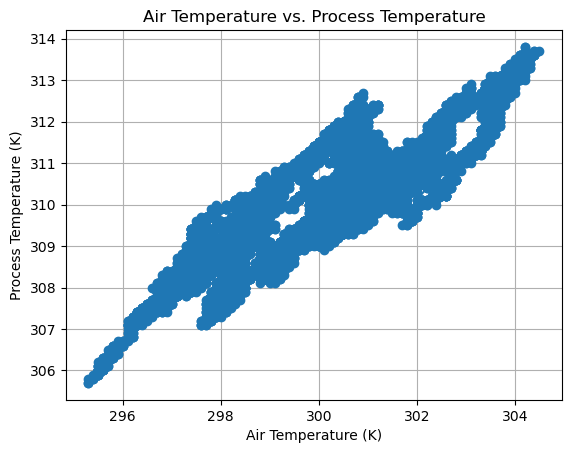

In [4]:
# Let's extract the columns we need for the chart
air_temperature = predictive_maintenance['Air temperature [K]']
process_temperature = predictive_maintenance['Process temperature [K]']

# Line chart
plt.plot(air_temperature, process_temperature, marker='o')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Process Temperature (K)')
plt.title('Air Temperature vs. Process Temperature')
plt.grid(True)
plt.show()

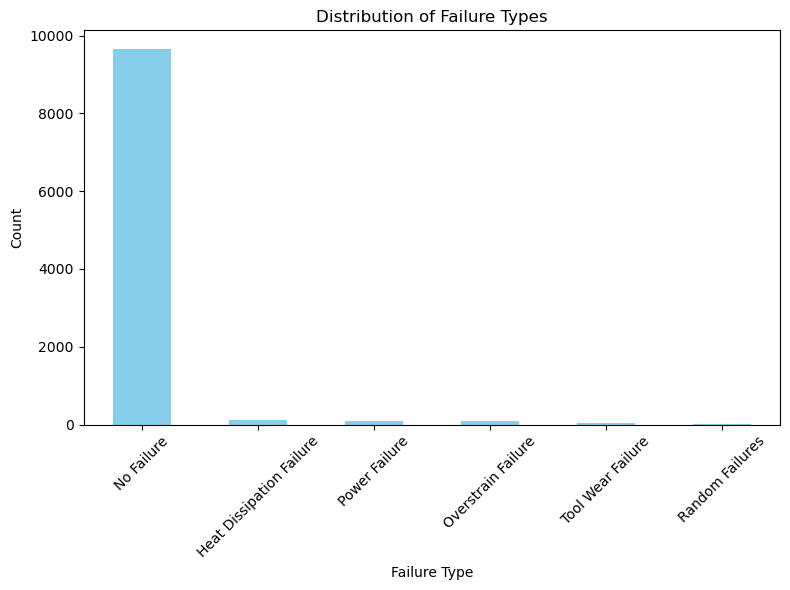

In [5]:
plt.figure(figsize=(8, 6))
failure_counts = predictive_maintenance['Failure Type'].value_counts()
failure_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.title('Distribution of Failure Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Eyram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


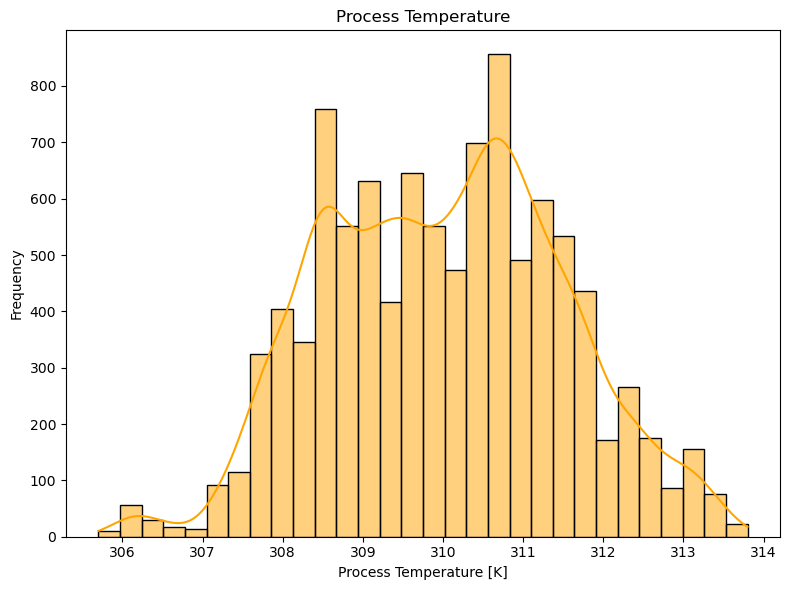

In [6]:
# Creating the histogram for Process Temperature
plt.figure(figsize=(8, 6))
sns.histplot(predictive_maintenance['Process temperature [K]'], bins=30, kde=True, color='orange')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Frequency')
plt.title('Process Temperature')
plt.tight_layout()
plt.show()


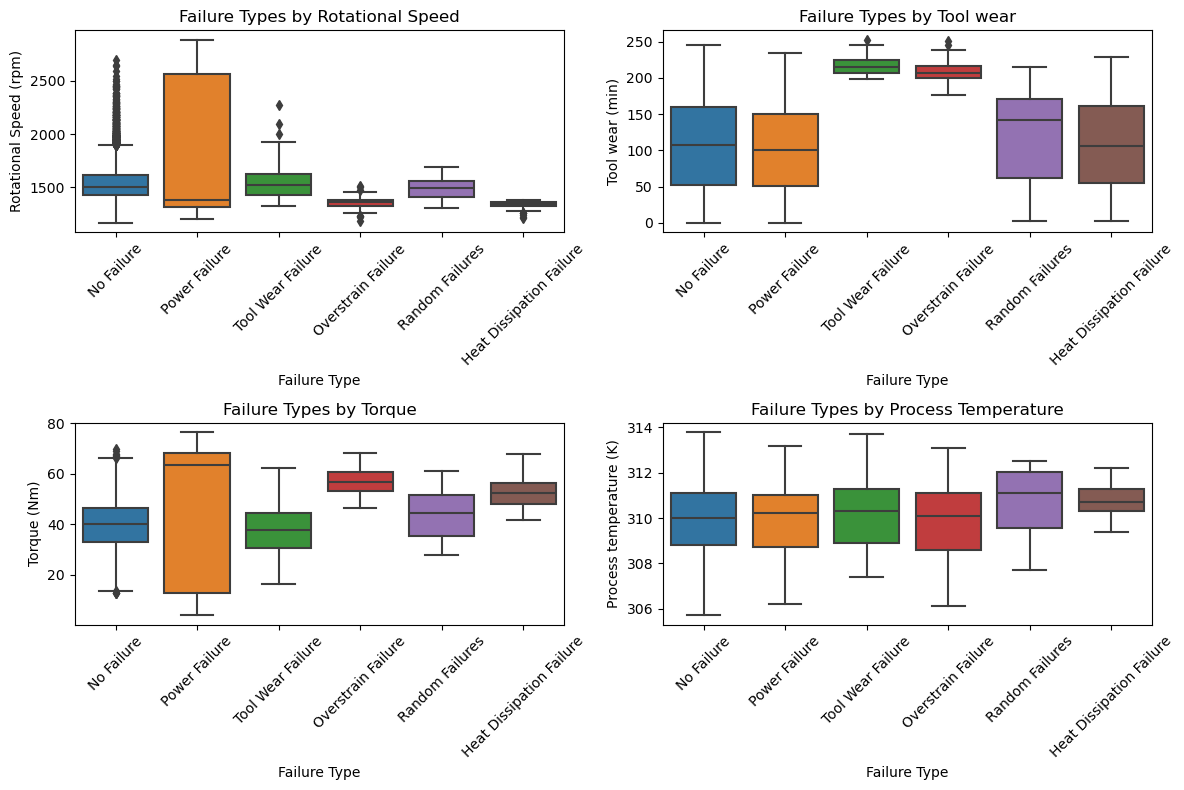

In [7]:
plt.figure(figsize=(12, 8))

# Boxplot of Failure Types by Rotational Speed
plt.subplot(221)
sns.boxplot(x='Failure Type', y='Rotational speed [rpm]', data=predictive_maintenance)
plt.xlabel('Failure Type')
plt.ylabel('Rotational Speed (rpm)')
plt.title('Failure Types by Rotational Speed')
plt.xticks(rotation=45)

# Boxplot of Failure Types by Tool wear
plt.subplot(222)
sns.boxplot(x='Failure Type', y='Tool wear [min]', data=predictive_maintenance)
plt.xlabel('Failure Type')
plt.ylabel('Tool wear (min)')
plt.title('Failure Types by Tool wear')
plt.xticks(rotation=45)

# Boxplot of Failure Types by Torque
plt.subplot(223)
sns.boxplot(x='Failure Type', y='Torque [Nm]', data=predictive_maintenance)
plt.xlabel('Failure Type')
plt.ylabel('Torque (Nm)')
plt.title('Failure Types by Torque')
plt.xticks(rotation=45)

# Boxplot of Failure Types by Process Temperature
plt.subplot(224)
sns.boxplot(x='Failure Type', y='Process temperature [K]', data=predictive_maintenance)
plt.xlabel('Failure Type')
plt.ylabel('Process temperature (K)')
plt.title('Failure Types by Process Temperature')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Milestone 2 ###

In [8]:
# Print list of columns
predictive_maintenance.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [9]:
# Removing the 'Product ID' column
predictive_maintenance.drop(['Product ID'], axis=1, inplace=True)

# Print list of columns
predictive_maintenance.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [10]:
predictive_maintenance.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


Features transformation

In [11]:
# Function to convert temperature from kelvin to Fahrenheit
def kelvin_to_f(temperature_kelvin):
    temperature_f = ((temperature_kelvin-273.15)*9/5)+32
    return temperature_f

# Let's create a new columns called Air temperature [F]
predictive_maintenance['Air temperature [F]'] = predictive_maintenance['Air temperature [K]'].apply(kelvin_to_f)

# Let's create a new columns called Process temperature [F]
predictive_maintenance['Process temperature [F]'] = predictive_maintenance['Process temperature [K]'].apply(kelvin_to_f)

# Let's now drop the columns 'Air temperature [K]' and Process temperature [K]
predictive_maintenance.drop(['Air temperature [K]', 'Process temperature [K]'], axis=1, inplace=True)

# Print the dataset
predictive_maintenance.head(5)

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [F],Process temperature [F]
0,M,1551,42.8,0,0,No Failure,76.91,95.81
1,L,1408,46.3,3,0,No Failure,77.09,95.99
2,L,1498,49.4,5,0,No Failure,76.91,95.63
3,L,1433,39.5,7,0,No Failure,77.09,95.81
4,L,1408,40.0,9,0,No Failure,77.09,95.99


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Columns to scale
numeric_columns = ['Process temperature [F]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Air temperature [F]']

# Fitting the scaler
scaler.fit(predictive_maintenance[numeric_columns])

# Transforming the columns usinf the fitted scaler
predictive_maintenance[numeric_columns] = scaler.transform(predictive_maintenance[numeric_columns])

# Print the dataset
predictive_maintenance.head(5)

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [F],Process temperature [F]
0,M,0.222934,0.535714,0.000000,0,No Failure,0.304348,0.358025
1,L,0.139697,0.583791,0.011858,0,No Failure,0.315217,0.370370
2,L,0.192084,0.626374,0.019763,0,No Failure,0.304348,0.345679
3,L,0.154249,0.490385,0.027668,0,No Failure,0.315217,0.358025
4,L,0.139697,0.497253,0.035573,0,No Failure,0.315217,0.370370


In [13]:
# Power consumption
predictive_maintenance['Power consumption [W]'] = predictive_maintenance['Rotational speed [rpm]'] * predictive_maintenance['Torque [Nm]']

# Difference between temperatures
predictive_maintenance['Temperature difference [F]'] = predictive_maintenance['Air temperature [F]'] - predictive_maintenance['Process temperature [F]']

# Ratio of temperatures
predictive_maintenance['Temperature ratio'] = predictive_maintenance['Air temperature [F]'] / predictive_maintenance['Process temperature [F]']

In [14]:
# Print the dataset
predictive_maintenance.head(5)

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [F],Process temperature [F],Power consumption [W],Temperature difference [F],Temperature ratio
0,M,0.222934,0.535714,0.000000,0,No Failure,0.304348,0.358025,0.119429,-0.053677,0.850075
1,L,0.139697,0.583791,0.011858,0,No Failure,0.315217,0.370370,0.081554,-0.055153,0.851087
2,L,0.192084,0.626374,0.019763,0,No Failure,0.304348,0.345679,0.120316,-0.041331,0.880435
3,L,0.154249,0.490385,0.027668,0,No Failure,0.315217,0.358025,0.075641,-0.042807,0.880435
4,L,0.139697,0.497253,0.035573,0,No Failure,0.315217,0.370370,0.069465,-0.055153,0.851087


In [15]:
# Checking for missing values
missing_values = predictive_maintenance.isnull()
total_missing_per_column = missing_values.sum()
print(total_missing_per_column)

Type                          0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
Air temperature [F]           0
Process temperature [F]       0
Power consumption [W]         0
Temperature difference [F]    0
Temperature ratio             2
dtype: int64


In [16]:
# Finding rows with missing values
rows_with_missing_values = predictive_maintenance[predictive_maintenance.isnull().any(axis=1)]

# Printing rows with missing values
rows_with_missing_values

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [F],Process temperature [F],Power consumption [W],Temperature difference [F],Temperature ratio
917,L,0.178696,0.648352,0.739130,0,No Failure,0.0,0.0,0.115858,0.0,NaN
918,M,0.177532,0.476648,0.747036,0,No Failure,0.0,0.0,0.084620,0.0,NaN


In [17]:
# Replacing the  NaN values with 0
predictive_maintenance['Temperature ratio'].fillna(0, inplace=True)

In [18]:
# Let's check again for any missing values
missing_values = predictive_maintenance.isnull()
total_missing_per_column = missing_values.sum()
print(total_missing_per_column)

Type                          0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
Air temperature [F]           0
Process temperature [F]       0
Power consumption [W]         0
Temperature difference [F]    0
Temperature ratio             0
dtype: int64


In [19]:
# Creating dummy variables for Type
dummy_variables = pd.get_dummies(predictive_maintenance['Type'], prefix='Type')

# Let's concatenate the dummy variables with the dataset
predictive_maintenance_with_dummies = pd.concat([predictive_maintenance, dummy_variables], axis=1)

# Printing the first few rows of the new dataset
predictive_maintenance_with_dummies.head(5)

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [F],Process temperature [F],Power consumption [W],Temperature difference [F],Temperature ratio,Type_H,Type_L,Type_M
0,M,0.222934,0.535714,0.000000,0,No Failure,0.304348,0.358025,0.119429,-0.053677,0.850075,False,False,True
1,L,0.139697,0.583791,0.011858,0,No Failure,0.315217,0.370370,0.081554,-0.055153,0.851087,False,True,False
2,L,0.192084,0.626374,0.019763,0,No Failure,0.304348,0.345679,0.120316,-0.041331,0.880435,False,True,False
3,L,0.154249,0.490385,0.027668,0,No Failure,0.315217,0.358025,0.075641,-0.042807,0.880435,False,True,False
4,L,0.139697,0.497253,0.035573,0,No Failure,0.315217,0.370370,0.069465,-0.055153,0.851087,False,True,False


### Milestone 3 ###

In [20]:
predictive_maintenance['Failure'] = predictive_maintenance['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)

In [21]:
# Let's drop the target columns before creating the dummy variables
predictive_maintenance_dropped = predictive_maintenance.drop(columns=['Failure Type', 'Failure'])

# Let's convert categorical variables to dummy variables
predictive_maintenance_converted = pd.get_dummies(predictive_maintenance_dropped)

In [22]:
predictive_maintenance.columns

Index(['Type', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Target', 'Failure Type', 'Air temperature [F]',
       'Process temperature [F]', 'Power consumption [W]',
       'Temperature difference [F]', 'Temperature ratio', 'Failure'],
      dtype='object')

In [23]:
# Let's define the features and target
features = predictive_maintenance_converted
target = predictive_maintenance['Failure']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [25]:
# Let's initialize and train a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(features_train, target_train)

LogisticRegression(max_iter=1000)

In [26]:
# Let's predict and evaluate our model
logreg_predictions = logreg_model.predict(features_test)

print("Logistic Regression")
print(classification_report(target_test, logreg_predictions))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1927
           1       0.93      0.96      0.95        73

    accuracy                           1.00      2000
   macro avg       0.97      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000



In [27]:
# Let's calculate the accuracy
from sklearn.metrics import accuracy_score
logreg_accuracy = accuracy_score(target_test, logreg_predictions)
# Printing the accuracy
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.996


In [28]:
# Let's define the target for the multiclass classification
target_multiclass = predictive_maintenance['Failure Type']

# SPlitting the data
features_train_mc, features_test_mc, target_train_mc, target_test_mc = train_test_split(features, target_multiclass, test_size=0.2, random_state=0)

In [29]:
# Let's train and evaluate a random forest model RFM
from sklearn.ensemble import RandomForestClassifier

# Initilization
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(features_train_mc, target_train_mc)

RandomForestClassifier(random_state=0)

In [30]:
# Prediction and evaluating the model
rf_predictions = rf_model.predict(features_test_mc)
print("Random Forest Classification:")
print(classification_report(target_test_mc, rf_predictions))

Random Forest Classification:
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.95      1.00      0.98        21
              No Failure       1.00      1.00      1.00      1927
      Overstrain Failure       0.86      0.90      0.88        21
           Power Failure       0.74      0.94      0.83        18
         Random Failures       0.00      0.00      0.00         3
       Tool Wear Failure       1.00      0.80      0.89        10

                accuracy                           0.99      2000
               macro avg       0.76      0.77      0.76      2000
            weighted avg       0.99      0.99      0.99      2000



C:\Users\Eyram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eyram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eyram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Let's calculate the accuracy
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(target_test_mc, rf_predictions)
# Printing the accuracy
print("Logistic Regression Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.9935
